In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 无监督学习(Unsupervised learning)

## 分类(classfication)与聚类(clustering)

* 聚类，将物理或抽象的对象集合分成由类似的对象组成的不同的多个组（类、簇）的过程。
* 分类，已知具体类别，将对象识别为某个具体类（class）的过程。

聚类是一种典型的无监督学习，一种知识发现、知识获取的手段，由具体的个体到抽象为类的过程。


聚类将样本划分成不同组，这些组叫作簇（cluster）。
使得
* 一个簇内的数据点非常相似
* 不同簇间的数据非常不同


# 1. k-means 聚类

k-means聚类是一种聚类算法，又名k均值算法。

算法思想：
1. 先有$k$个簇的中心
2. 对于每一个样本，计算样本与这$k$个“簇中心”的距离，将其划分到与其距离最近的“簇中心”所在的簇中；
3. 重新计算各个簇的新的“簇中心”。
4. 重复2~3步，直到簇的中心不再发生移动.

实现kmeans算法的三点：
1. 簇个数$k$的选择
2. 各个样本点到“簇中心”的距离
3. 根据新划分的簇，更新“簇中心” 


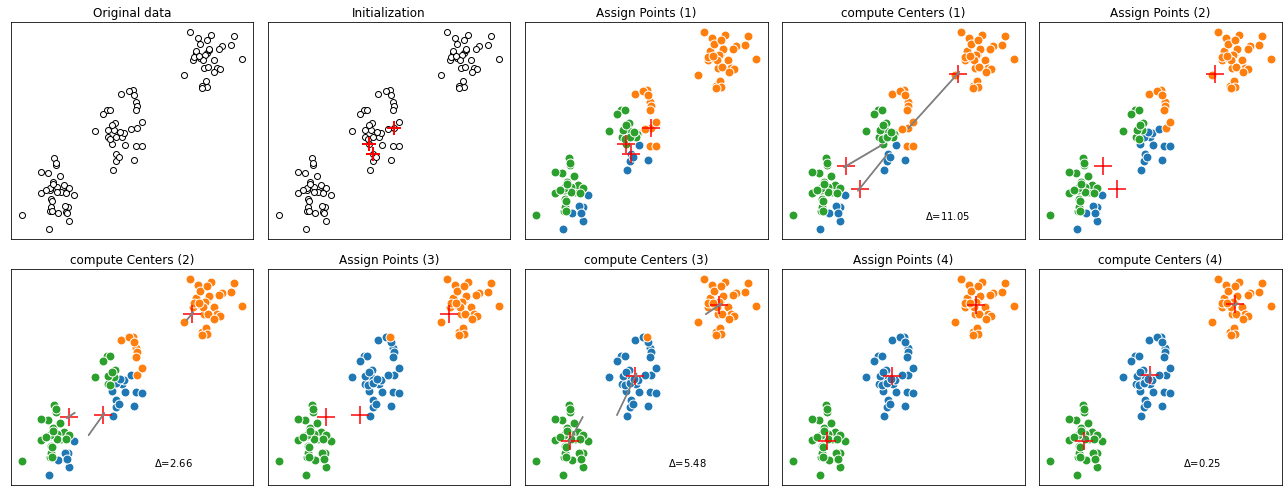

In [2]:
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


def plot_kmeans_algorithm():
    k = 3
    X, y = make_blobs(random_state=3)

    fig, axes = plt.subplots(2, 5, figsize=(18, 7), subplot_kw={'xticks': (), 'yticks': ()})
    axes = axes.ravel()
    ax = axes[0]
    ax.set_title("Original data")
    ax.scatter(X[:, 0], X[:, 1], marker="o", ec="k", c="w")

    ax = axes[1]
    ax.set_title("Initialization")
    init = X[np.where(y==0)[0][0:3], :]
    
    ax.scatter(X[:, 0], X[:, 1], marker="o", ec="k", c="w")
    
    for label in range(k):
        ax.scatter(init[:, 0], init[:, 1], marker="+", s=200, ec="red")


    i = 2
    centers = init
    for iter_no in range(1, 5):
        ax = axes[i]
        ax.set_title(f"Assign Points ({iter_no})")
        
        # 计算样本到中心点的距离，选择最近的簇作为其所属簇
        labels = np.argmin(pairwise_distances(centers, X), axis=0)
        
        for label in range(k):
            ax.scatter(X[labels==label, 0], X[labels==label, 1], s=80, ec="w", marker="o")

        for label in range(k):
            ax.scatter(centers[label, 0], centers[label, 1], marker="+", s=300, ec="red")
            
        i += 1
        ax = axes[i]
        ax.set_title(f"compute Centers ({iter_no})")
        for label in range(k):
            ax.scatter(X[labels==label, 0], X[labels==label, 1], s=80, ec="w", marker="o")

        
        _centers = np.zeros((k,2))
        for label in range(k): # 重新计算簇的中心点
            _centers[label,:] = X[labels==label,:].mean(axis=0)
            ax.arrow(centers[label,0], centers[label, 1], 
                     _centers[label,0] - centers[label,0], 
                     _centers[label,1]- centers[label,1], color="grey", width=0.05)
        
        delta = np.sqrt(((centers - _centers)**2).sum(axis=1)).sum()
        centers = _centers
        ax.text(3.5, -1, f"$\Delta$={delta:.02f}")
        
        for label in range(k):
            ax.scatter(centers[label, 0], centers[label, 1], marker="+", s=300, ec="red")
        ax
            
        i += 1

plot_kmeans_algorithm()
plt.tight_layout()

In [1]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=3)

In [2]:
y

array([2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2, 2, 2, 0, 1, 2, 2, 1, 1, 0, 0,
       1, 0, 1, 2, 2, 0, 1, 2, 0, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0,
       1, 1, 0, 1, 2, 1, 0, 2, 1, 2, 1, 2, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0,
       2, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1, 2,
       0, 2, 0, 2, 2, 1, 2, 1, 1, 0, 2, 2])

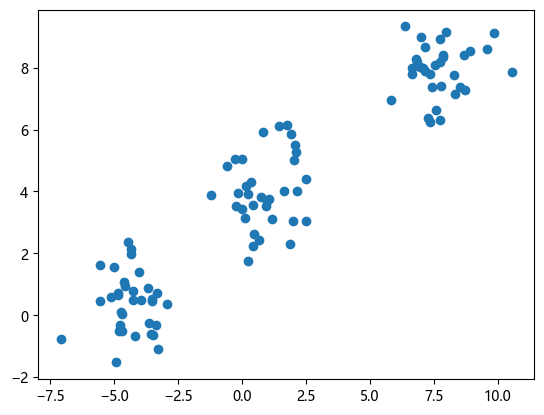

In [4]:
plt.scatter(X[:,0], X[:, 1]);

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

kmeans.fit(X)
kmeans.labels_

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 2,
       0, 2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2,
       0, 0, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 2, 2, 0, 2,
       1, 0, 2, 0, 0, 1, 2, 0, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 1, 2, 0, 1,
       2, 1, 2, 1, 1, 0, 1, 0, 0, 2, 1, 1], dtype=int32)

In [26]:
y

array([2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2, 2, 2, 0, 1, 2, 2, 1, 1, 0, 0,
       1, 0, 1, 2, 2, 0, 1, 2, 0, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0,
       1, 1, 0, 1, 2, 1, 0, 2, 1, 2, 1, 2, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0,
       2, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1, 2,
       0, 2, 0, 2, 2, 1, 2, 1, 1, 0, 2, 2])

In [ ]:
kmeans.labels_

In [20]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[0 1 1 1 0 1 1 0 1 2 1 0 0 0 2 1 0 0 1 1 2 2 1 2 1 0 0 2 1 0 2 2 0 1 0 0 2
 2 2 0 0 0 2 2 1 1 2 1 0 1 2 0 1 0 1 0 1 0 2 2 2 1 2 2 1 2 0 1 2 1 1 0 2 1
 2 2 1 2 0 1 2 2 2 2 0 2 1 0 2 0 2 0 0 1 0 1 1 2 0 0]


In [27]:
print(kmeans.predict(X))

[1 0 0 0 1 0 0 1 0 2 0 1 1 1 2 0 1 1 0 0 2 2 0 2 0 1 1 2 0 1 2 2 1 0 1 1 2
 2 2 1 1 1 2 2 0 0 2 0 1 0 2 1 0 1 0 1 0 1 2 2 2 0 2 2 0 2 1 0 2 0 0 1 2 0
 2 2 0 2 1 0 2 2 2 2 1 2 0 1 2 1 2 1 1 0 1 0 0 2 1 1]


In [21]:
kmeans.cluster_centers_

array([[ 7.72441624,  7.92440438],
       [-4.3748783 ,  0.39784433],
       [ 0.88587299,  4.01512953]])

In [7]:
kmeans.n_clusters

3

In [29]:
def plot_clusters(kmeans, X, ax=None):
    if ax is None:
        ax = plt.gca()
        
    for label in range(kmeans.n_clusters):
        ax.scatter(X[kmeans.labels_==label, 0], X[kmeans.labels_==label, 1], s=80, ec="w", marker="o")

    for label in range(kmeans.n_clusters):
        ax.scatter(kmeans.cluster_centers_[label, 0], kmeans.cluster_centers_[label, 1], marker="+", s=300, facecolor="red")

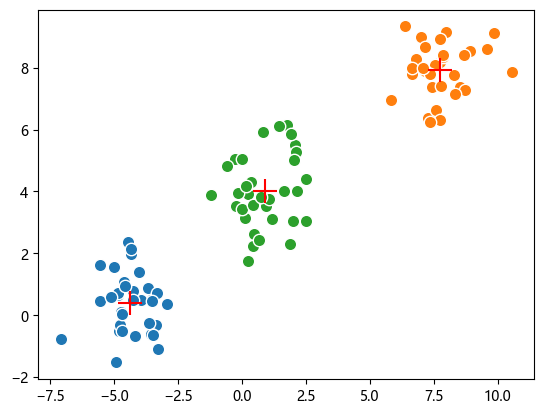

In [35]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

plot_clusters(kmeans, X)

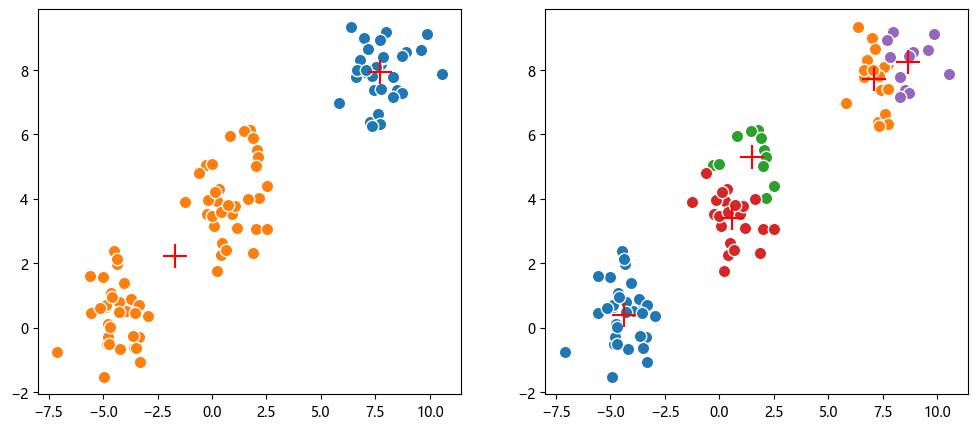

In [24]:
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(X)

kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(X)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes = axes.ravel()

plot_clusters(kmeans2, X, ax=axes[0])
plot_clusters(kmeans5, X, ax=axes[1])

## Kmeans失效的例子

由于k-means算法特点，
* 簇都是“凸形(convex)”的
* 倾向于所有簇在某种程度上具有相同的直径
* 簇之间的边界更好画在簇中心的中间位置

#### (1) 簇的密度不同

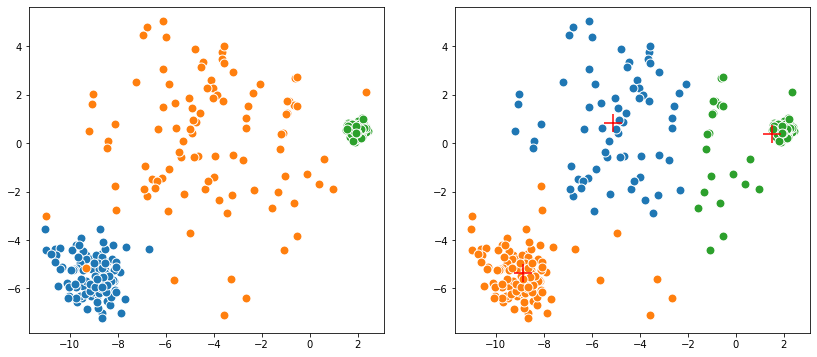

In [11]:
X_varied, y_varied = make_blobs(n_samples=300, 
                                cluster_std=[0.8, 2.5, 0.2], 
                                random_state=170)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_varied)

fig, axes = plt.subplots(1,2,figsize=(14, 6))
axes = axes.ravel()

ax = axes[0]
for i in range(3):
    ax.scatter(X_varied[y_varied==i,0], X_varied[y_varied==i,1], s=80, ec="w")

plot_clusters(kmeans, X_varied, ax=axes[1])


#### (2) 无法识别非球形簇

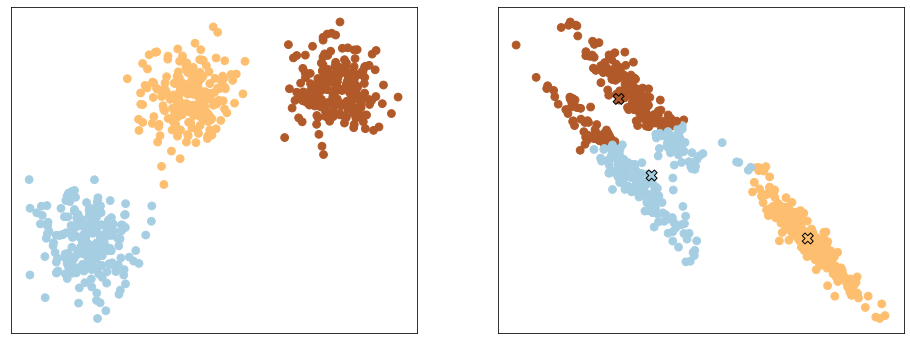

In [12]:
X, y = make_blobs(random_state=170, n_samples=600)

rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X_new = X @ transformation

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_new)
y_pred = kmeans.predict(X_new)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), subplot_kw={'xticks': (), 'yticks': ()})
axes[0].scatter(X[:, 0], X[:, 1], c=y, s=60, cmap='Paired')
axes[1].scatter(X_new[:, 0], X_new[:, 1], c=y_pred, s=60, cmap='Paired')
axes[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c=[0, 1, 2], s=120,
                marker='X', edgecolor='black', cmap='Paired');

#### (3) kmeans无法识别具有复杂形状的簇

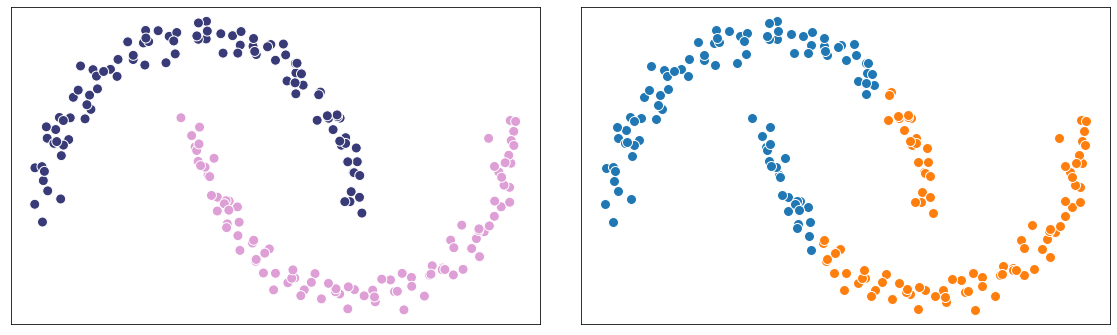

In [13]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

fig, axes = plt.subplots(1,2, figsize=(16, 5))
plt.tight_layout()
axes = axes.ravel()

ax = axes[0]

ax.scatter(X[:, 0], X[:, 1], c=y, s=100,  cmap=plt.cm.tab20b,  ec='w');
ax.set_xticks([]); ax.set_yticks([])

ax = axes[1]
ax.set_xticks([]); ax.set_yticks([])

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

for i in range(kmeans.n_clusters):
    ax.scatter(X[y_pred==i, 0], X[y_pred==i, 1], cmap=plt.cm.tab20b, ec="w", s=100)

## 2.3. 利用kmeans中心点进行抽象和向量化


对于复杂的结构，由于k-means特点(限制)无法直接“抽象”出结构得特点，但可以用更“细”尝试聚类，通过分析每个聚类的中心点之间关系得到抽象结构。

例如，对于上面交错两月牙图形，我们应用k=10的kmeans聚类

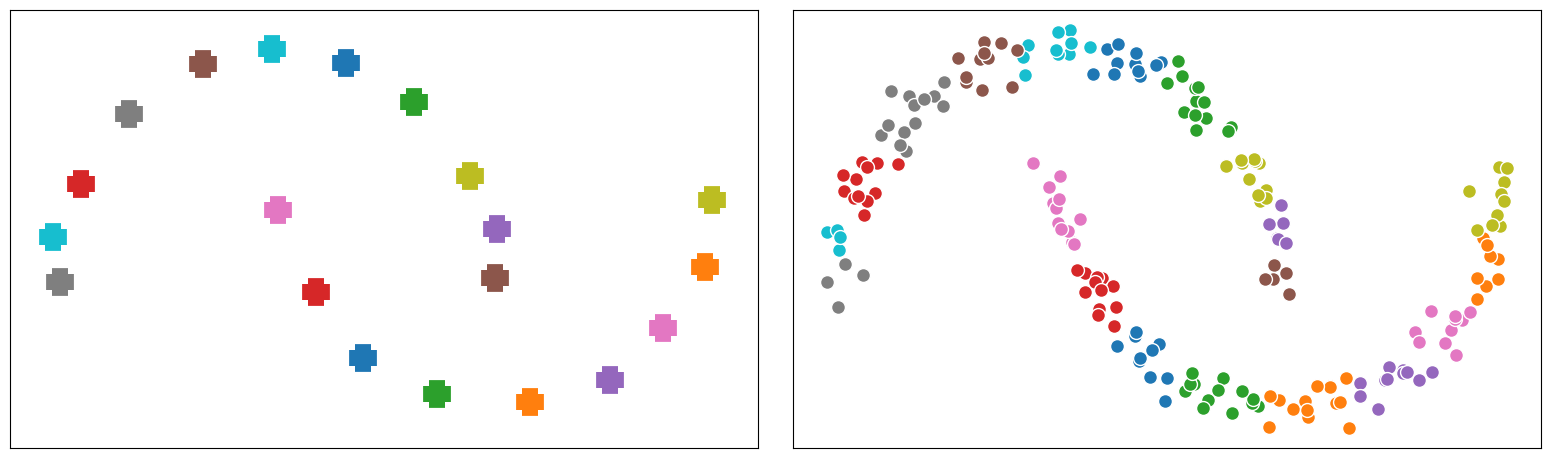

In [40]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=20, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

fig, axes = plt.subplots(1,2, figsize=(16, 5), sharex=True, sharey=True)
plt.tight_layout()
axes = axes.ravel()

ax = axes[0]
for i in range(kmeans.n_clusters):
    center = kmeans.cluster_centers_[i,:]
    ax.scatter(center[0], center[1], marker="+", linewidth=20, s=120)

ax = axes[1]
ax.set_xticks([]); ax.set_yticks([])

for i in range(kmeans.n_clusters):
    ax.scatter(X[y_pred==i, 0], X[y_pred==i, 1],  ec="w", s=100)
    

In [41]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=20, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

print("Cluster memberships:")
print(y_pred)

Cluster memberships:
[ 8  4  6 17 16  1 14  2  8 11 15 10 16 11  7 14 12 10  0  7  1  2  0 11
 15 13 16  1 13  0  8 15 11  6 12  1 10  5  3  6  2 15 12 13  4 15 14  7
 13  2  7 10  1 17 11 12 12 11  0 15 10 19 16  8 11 19  9  4  9  3  2  3
 10  6  2  3  6  8 12  2  1  9  2 18  6 15  5 15  2 18  0 14 18  7 18 16
 16 10 19 13 11 18  9  5  3  6 17 15  4  0  7  9  9  3  8  4 12  1  2  8
  8  7  6  9  6  7  5 13  4 18 14  7  3 13 11 16 11 19 18  8 13  6  0 15
 15  5 13  4  0  6 10  4  8  0  2  9 11 10 12 12 13 11 12  4 10 16 12  2
  4 11 12 17  3  3 13 11 18  7  7 12  4  3  1 16 18  0  9  2  3  7  3  0
  8 14  6  7 18 13  9 16]


这些聚类的中心点“代表”同聚类内的样本点，这些中心点表示出一种“新的”空间结构，以样本到各中心点距离构造空间维度。

例如，利用10个簇，作为10个分量，使用线性模型来表示下面的半月型，每个分量分别到10个簇中心的距离。

In [42]:
distance_features = kmeans.transform(X)

print("Distance feature shape:", distance_features.shape)
print("\nDistance features:")
print(distance_features)

Distance feature shape: (200, 20)

Distance features:
[[0.66469427 1.19403583 0.96602144 ... 1.87928753 1.15794154 1.87232855]
 [1.86548492 0.56214982 0.90852884 ... 2.64674495 0.82633282 2.71470548]
 [0.74012855 1.9595552  1.02233152 ... 1.0057037  1.98845995 1.01065187]
 ...
 [0.95566419 1.75637264 0.6882419  ... 1.1728053  1.828518   1.22620809]
 [0.18878858 2.02590756 1.56141354 ... 1.48864816 1.94785289 1.40065177]
 [1.76038842 0.43826191 0.93470511 ... 2.63008953 0.68585959 2.68765812]]


## 2.4. 使用k-means进行分解

尝试利用簇的中心来表示每个数据点

In [17]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split


people = fetch_lfw_people(data_home='../contrib_data', min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
X_people, y_people = people.data, people.target

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

In [18]:
%%time

from sklearn.decomposition import PCA

pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))

CPU times: user 2.97 s, sys: 1.73 s, total: 4.7 s
Wall time: 3.07 s


与PCA分解不同，k-means“分解”相当于信息检索，找到样本所在的聚类。

In [19]:
%%time

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]

CPU times: user 3min 30s, sys: 7.77 s, total: 3min 37s
Wall time: 1min 50s


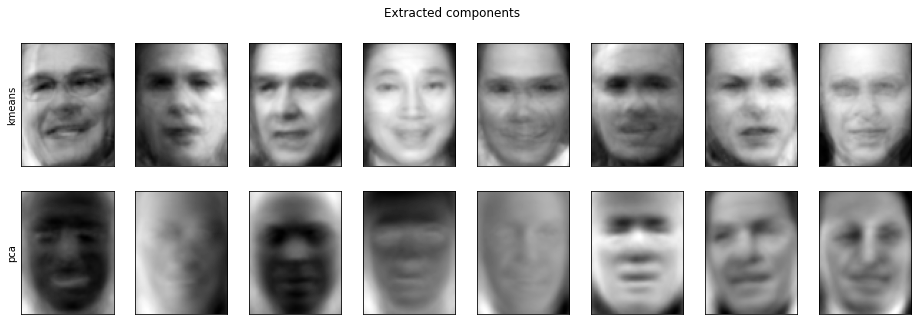

In [20]:
fig, axes = plt.subplots(2, 8, figsize=(16, 5), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted components")
for ax, comp_kmeans, comp_pca in zip(axes.T, kmeans.cluster_centers_, pca.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape), cmap='gray')
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='gray')

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca");

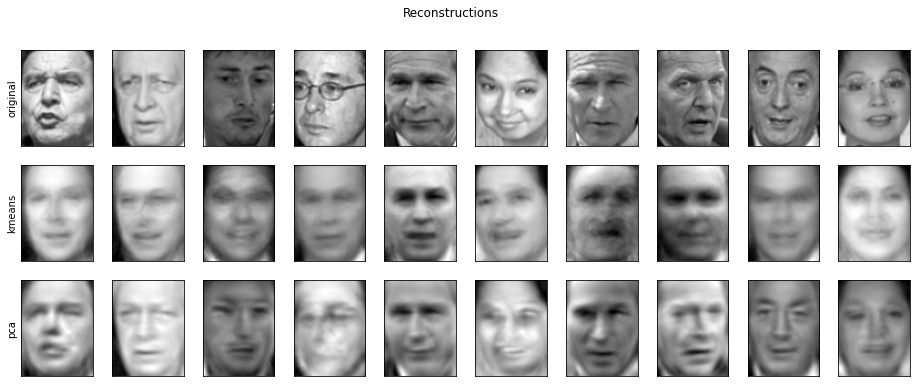

In [21]:
fig, axes = plt.subplots(3, 10, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(16, 6))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca in zip(axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca):

    ax[0].imshow(orig.reshape(image_shape), cmap='gray')
    ax[1].imshow(rec_kmeans.reshape(image_shape), cmap='gray')
    ax[2].imshow(rec_pca.reshape(image_shape), cmap='gray')

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca");


## k-means缺点
* 初始化是随机的。sckit-learn用10次kmeans，取最好结果。
* 簇形状假设的约束性强。
* 需要指定k值

# 凝聚聚类（Agglomerative Clustering）

在开始，每个点都是一个簇，然后合并（连接）两个最相近的簇，作为新簇，依次重复，直到满足停止条件。

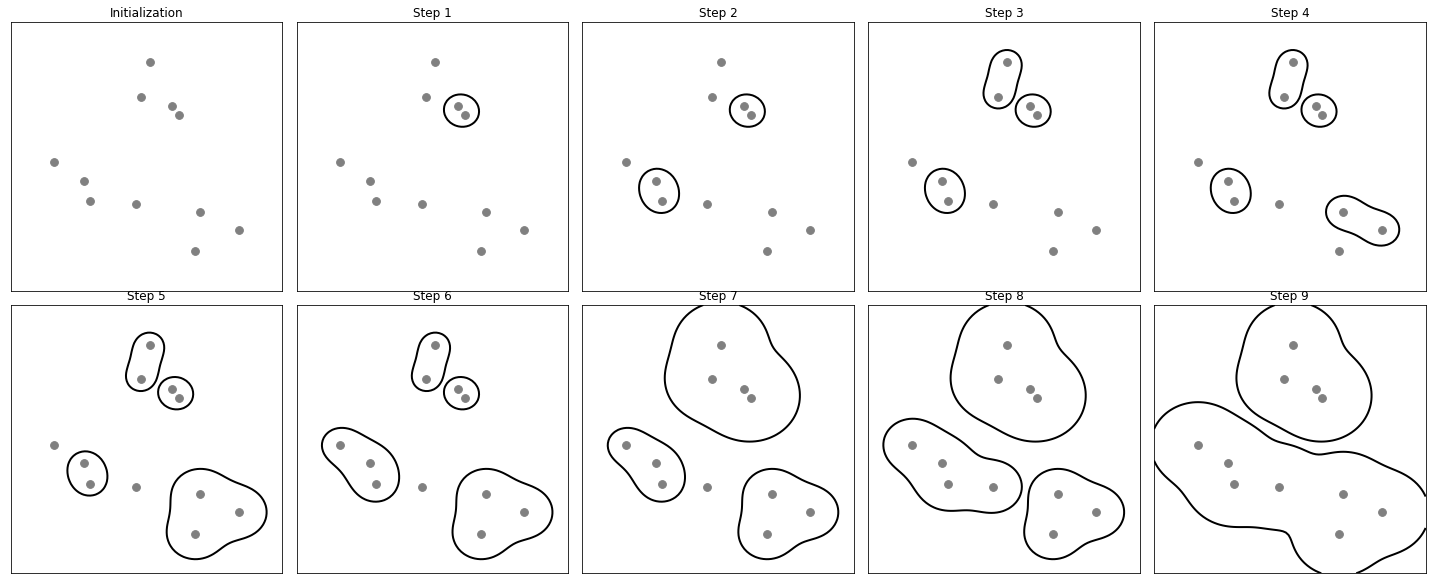

In [22]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.neighbors import KernelDensity

def plot_agglomerative_algorithm():
    # generate synthetic two-dimensional data
    X, y = make_blobs(random_state=0, n_samples=11)

    agg = AgglomerativeClustering(n_clusters=X.shape[0], compute_full_tree=True).fit(X)

    fig, axes = plt.subplots(X.shape[0] // 5, 5, subplot_kw={'xticks': (),
                                                             'yticks': ()},
                             figsize=(20, 8))
    fig.tight_layout()

    eps = X.std() / 1.5

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    gridpoints = np.c_[xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)]

    for i, ax in enumerate(axes.ravel()):
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        agg.n_clusters = X.shape[0] - i
        agg.fit(X)
        ax.set_title("Step %d" % i)
        ax.scatter(X[:, 0], X[:, 1], s=60, c='grey')
        bins = np.bincount(agg.labels_)
        for cluster in range(agg.n_clusters):
            if bins[cluster] > 1:
                points = X[agg.labels_ == cluster]
                other_points = X[agg.labels_ != cluster]

                kde = KernelDensity(bandwidth=.5).fit(points)
                scores = kde.score_samples(gridpoints)
                score_inside = np.min(kde.score_samples(points))
                score_outside = np.max(kde.score_samples(other_points))
                levels = .8 * score_inside + .2 * score_outside
                ax.contour(xx, yy, scores.reshape(100, 100), levels=[levels],
                           colors='k', linestyles='solid', linewidths=2)

    axes[0, 0].set_title("Initialization")
    

plot_agglomerative_algorithm()

## 两个聚类之间的距离的定义

* **single** 聚类之间的距离由其最接近的成员之间的距离来定义。

<center>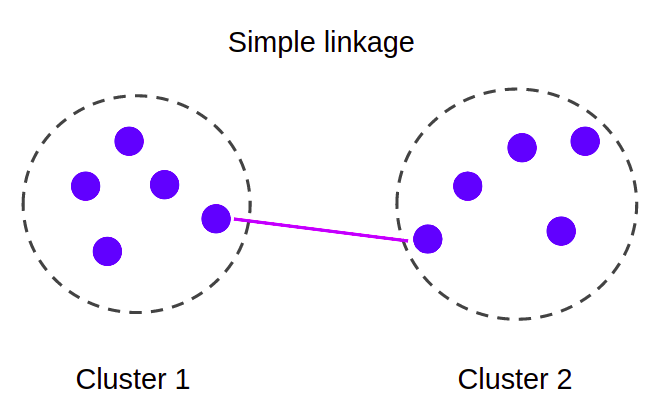</center>

* **complete**  聚类之间的距离由其最远成员之间的距离来定义。

<center>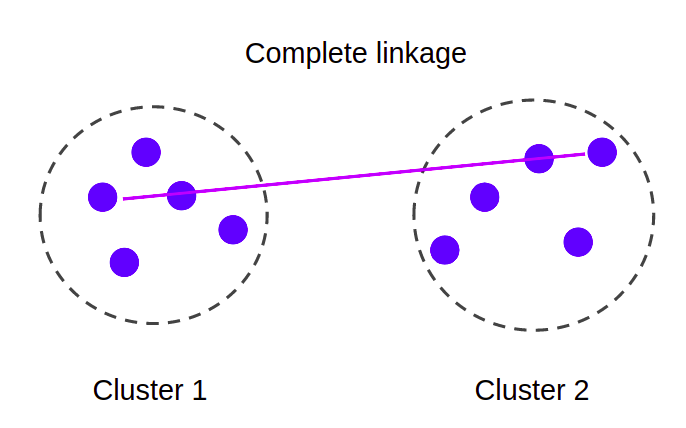</center>


* **average**：又称之为UPGMA (Unweighted Pair Group Method with Arithmetic mean)。计算每个群组的点数与两个群组的点数的百分比，如果它们被合并。

<center>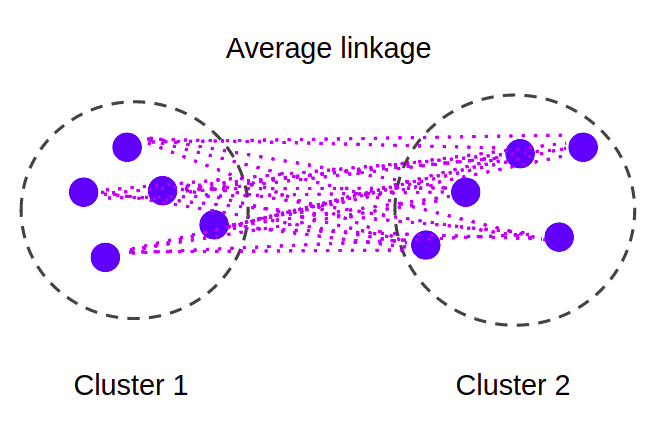</center>



* **centroid**: 又称之为UPGMC (Unweighted Pair Group Method using Centroids)。为每个聚类计算一个由所有点的平均值（中心点）定义的点，聚类之间的距离是它们各自中心点之间的距离。

<center>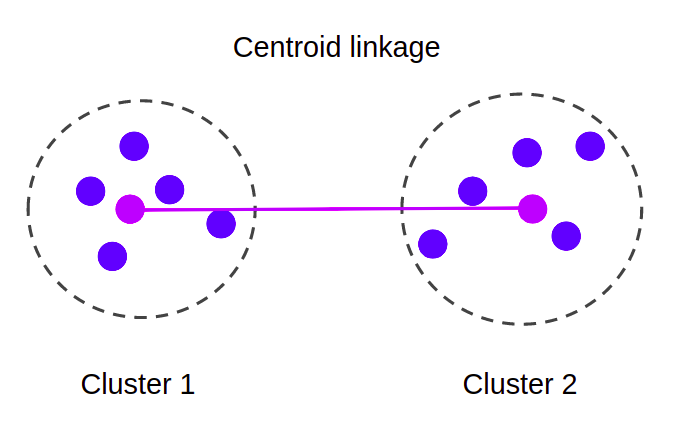</center>


* **ward**: 又称之为MISSQ (Minimal Increase of Sum-of-Squares)。指定两个集群之间的距离，计算平方误差之和（ESS），并根据较小的ESS依次选择下一个集群。沃德方法试图使每一步的ESS增幅最小。因此，使误差最小化。

<center>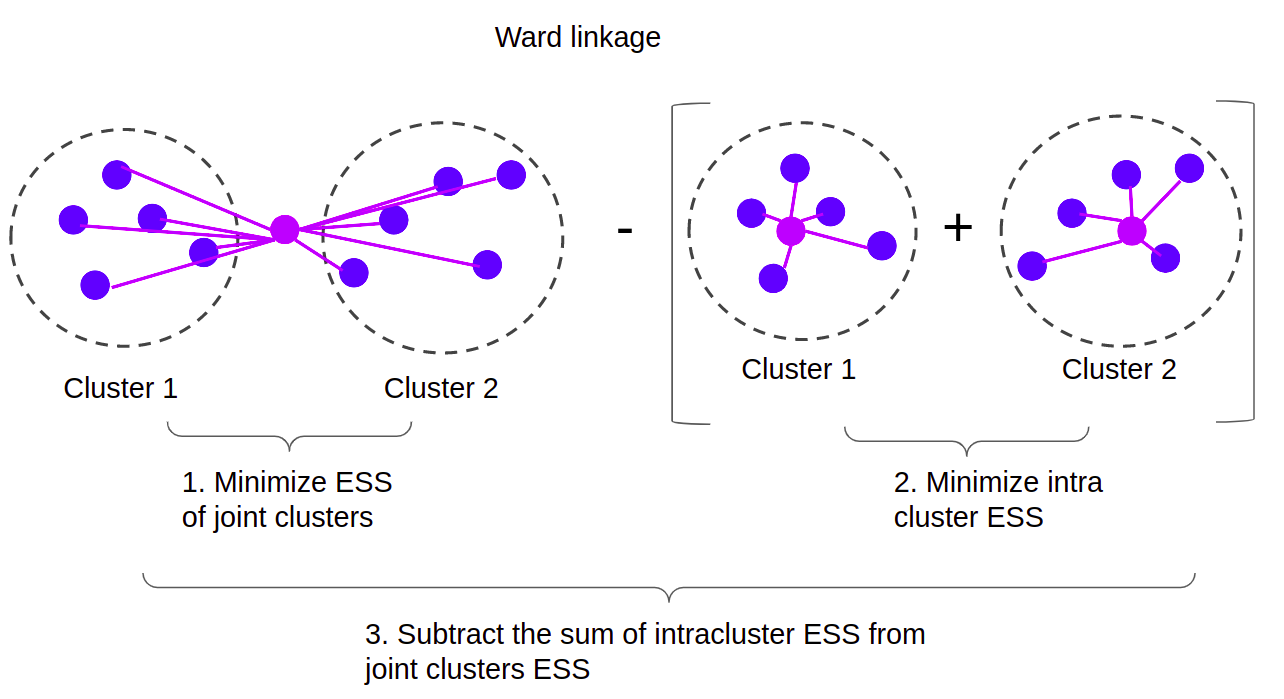</center>

## 距离的定义

<center>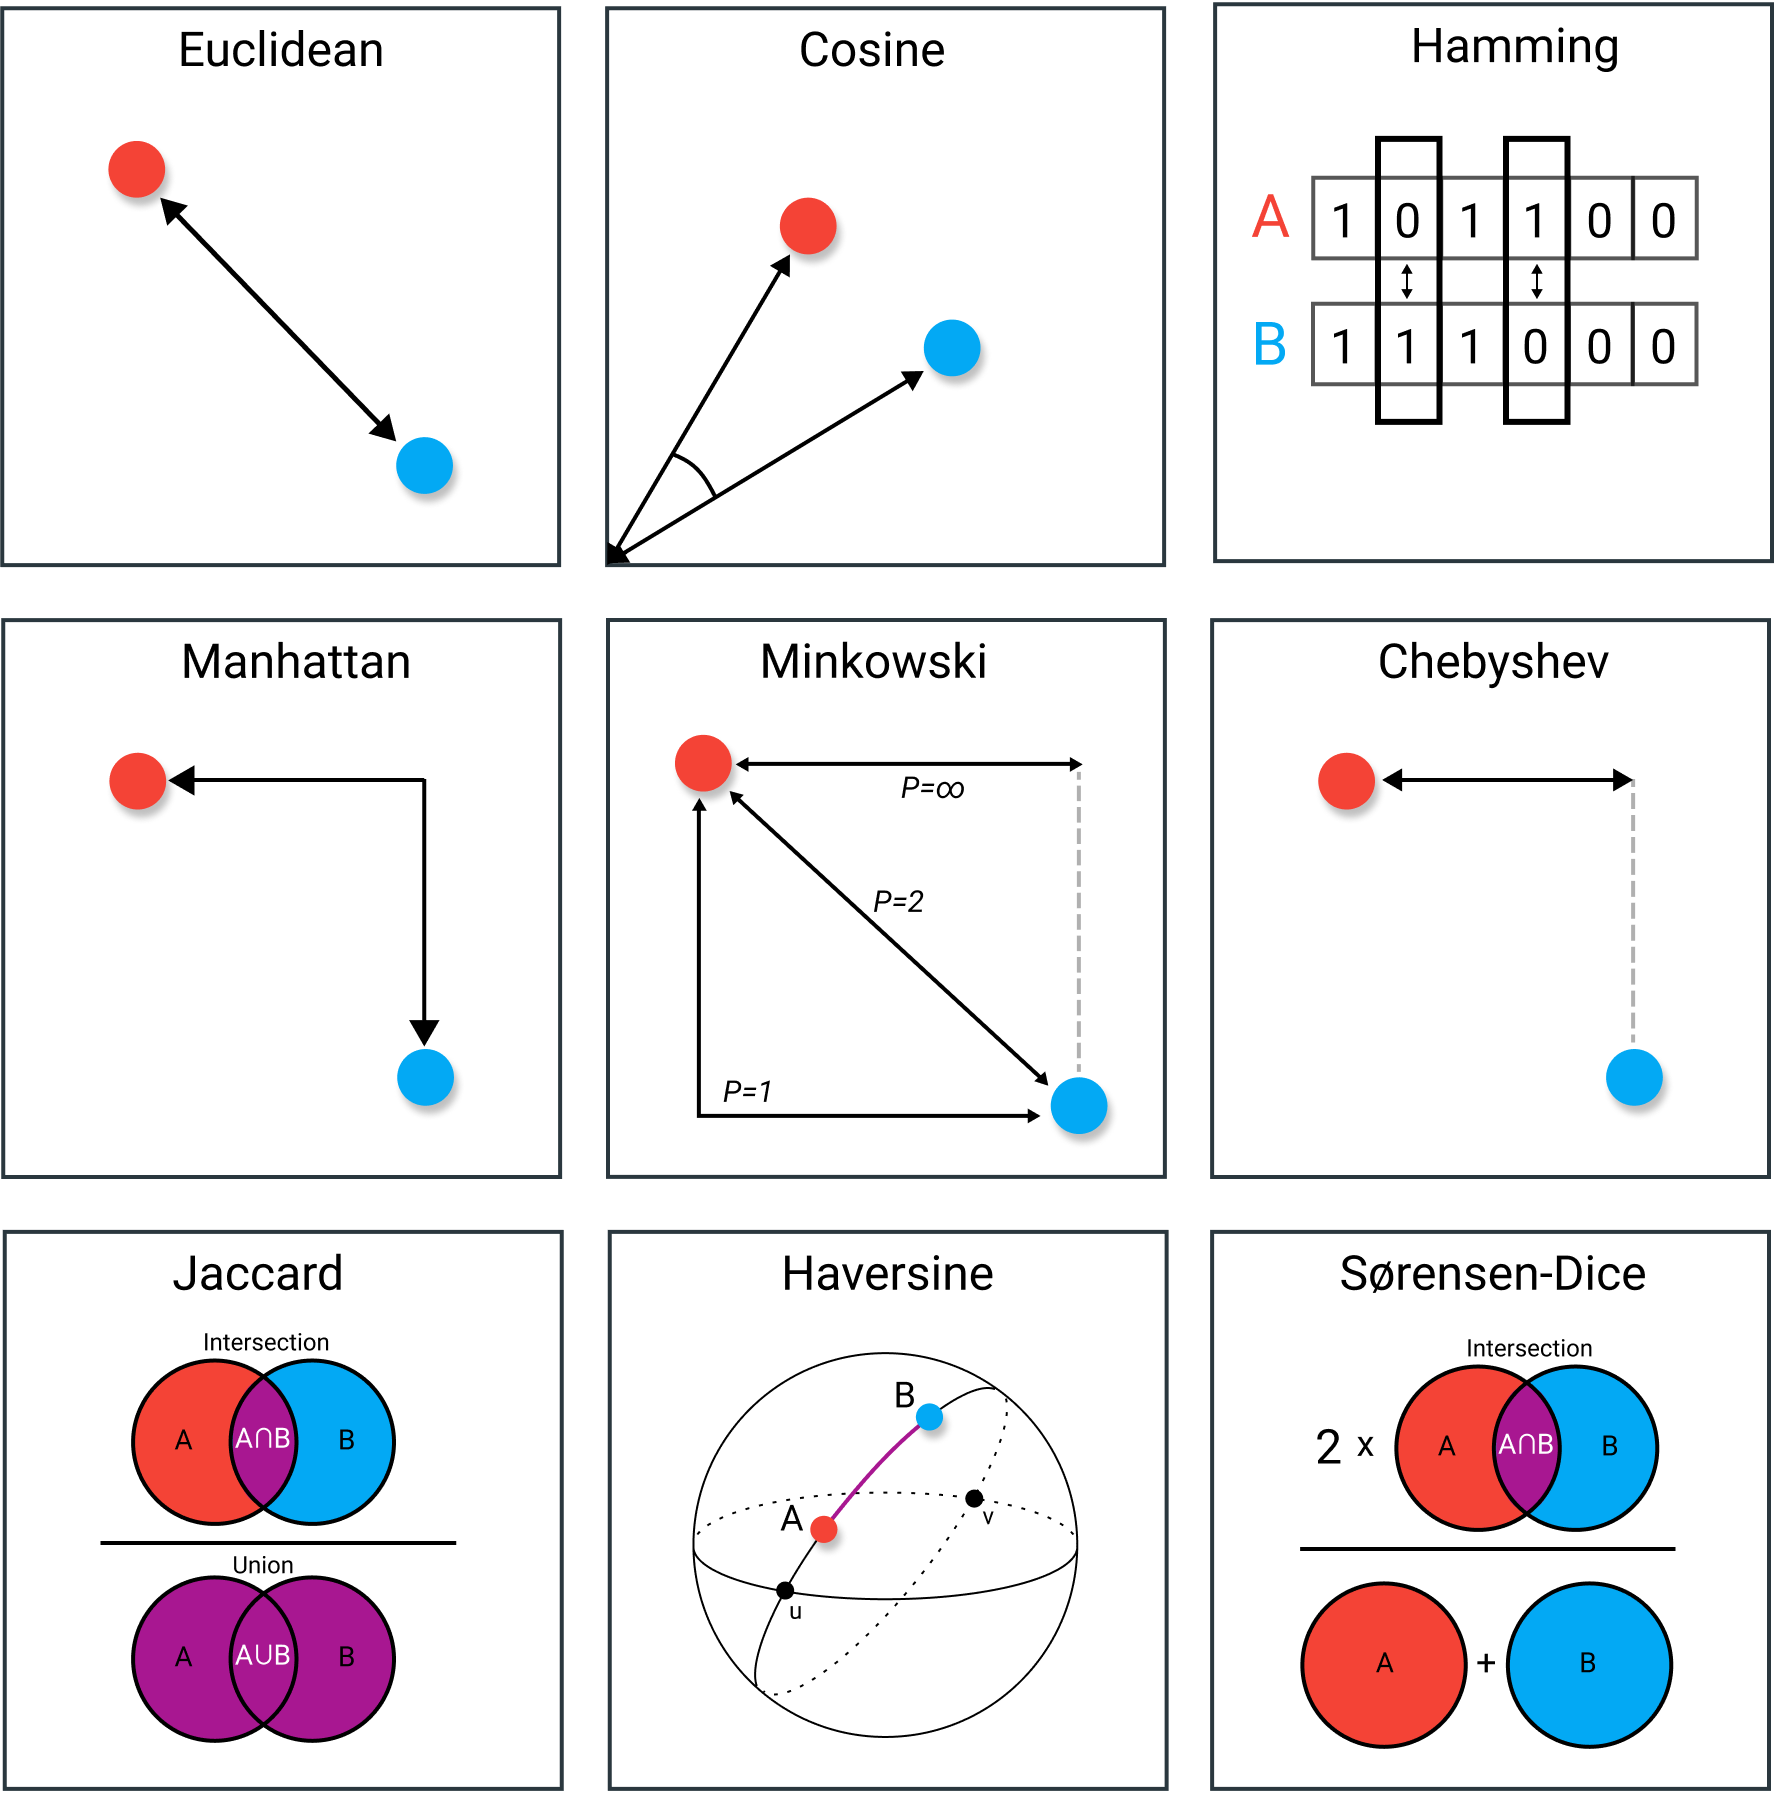</center>


## 常见不同聚类距离定义比较

<center>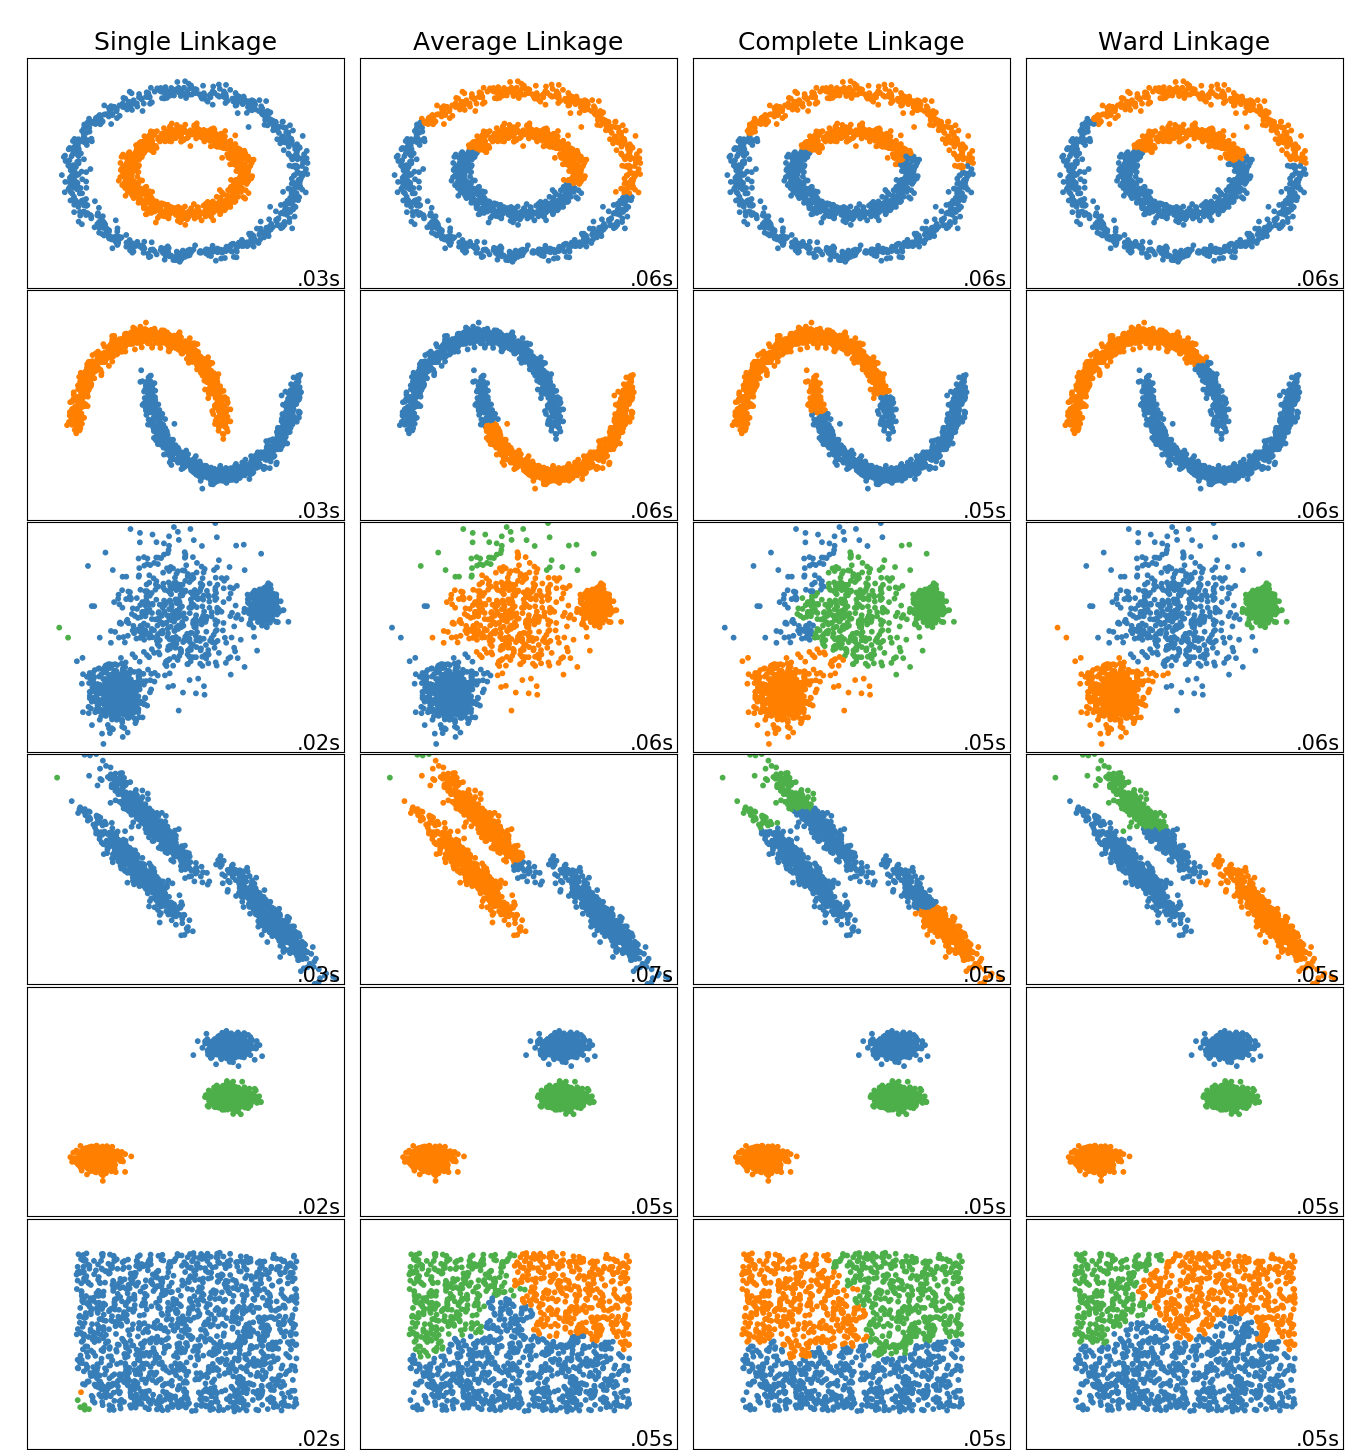</center>

## 层次聚类（Hierarchical Clustering）与系统树图（Dendrograms）

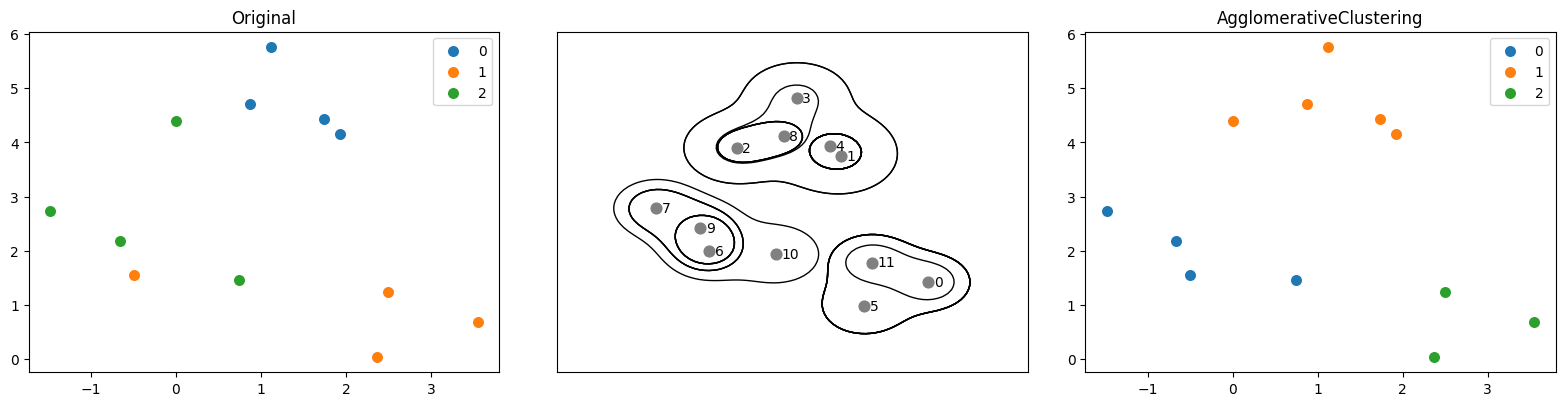

In [4]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity

X, y = make_blobs(random_state=0, n_samples=12)


def plot_agglomerative(ax=None):
#     X, y = make_blobs(random_state=0, n_samples=12)
    agg = AgglomerativeClustering(n_clusters=3, linkage="ward")

    eps = X.std()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    gridpoints = np.c_[xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)]

    for i, x in enumerate(X):
        ax.text(x[0] + .1, x[1], "%d" % i, horizontalalignment='left', verticalalignment='center')

    ax.scatter(X[:, 0], X[:, 1], s=60, c='grey')
    ax.set_xticks(())
    ax.set_yticks(())

    for i in range(10):
        agg.n_clusters = X.shape[0] - i
        agg.fit(X)

        bins = np.bincount(agg.labels_)
        for cluster in range(agg.n_clusters):
            if bins[cluster] > 1:
                points = X[agg.labels_ == cluster]
                other_points = X[agg.labels_ != cluster]

                kde = KernelDensity(bandwidth=.5).fit(points)
                scores = kde.score_samples(gridpoints)
                score_inside = np.min(kde.score_samples(points))
                score_outside = np.max(kde.score_samples(other_points))
                levels = .8 * score_inside + .2 * score_outside
                ax.contour(xx, yy, scores.reshape(100, 100), levels=[levels],
                           colors='k', linestyles='solid', linewidths=1)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)



fig, axes = plt.subplots(1,3, figsize=(16, 4), dpi=100)
fig.tight_layout()

ax = axes[0]
for i in range(3):
    ax.scatter(X[y==i, 0], X[y==i, 1], s=80, ec="w", label=f"{i}")
ax.legend(loc="best")
ax.set_title("Original")

ax = axes[1]
plot_agglomerative(ax=ax)

ax = axes[2]
agg = AgglomerativeClustering(n_clusters=3, linkage="ward")
clusters = agg.fit_predict(X)


for i in np.unique(clusters):
    ax.scatter(X[clusters==i, 0], X[clusters==i, 1], s=80, ec="w", label=f"{i}")
ax.legend(loc="best")
ax.set_title("AgglomerativeClustering");

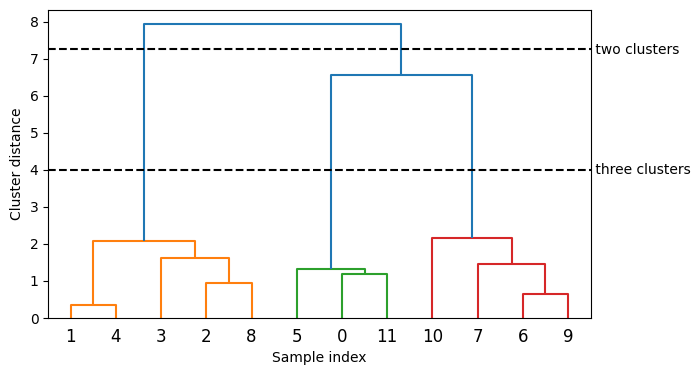

In [9]:
from scipy.cluster.hierarchy import dendrogram, ward, single, complete, average

X, y = make_blobs(random_state=0, n_samples=12)


plt.figure(figsize=(7, 4))
ax = plt.gca()

dendrogram(ward(X), ax=ax)

bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 10})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 10})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance");

凝聚聚类依然无法解决下面的复杂情况

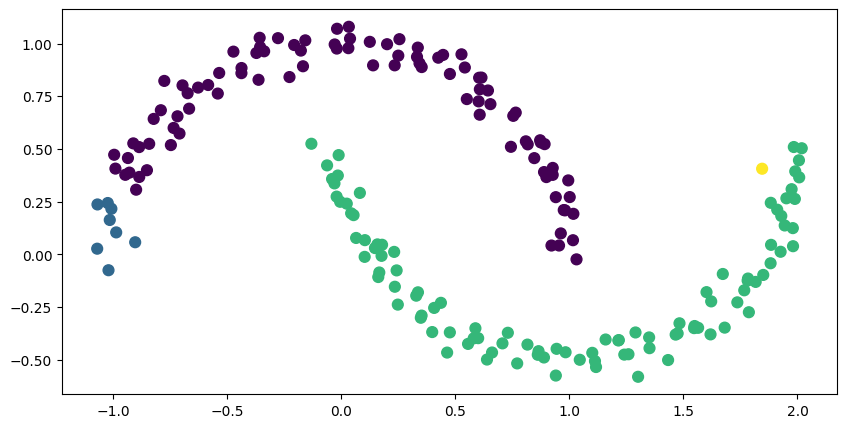

In [56]:
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

plt.figure(figsize=(10,5))
agg = AgglomerativeClustering(n_clusters=4, linkage="single")
y_pred = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60);

# DBSCAN (Denstiy-Based Spatial Clustering of Application with Noise)

该方法最大特点，不用先验的设置簇的个数

<center>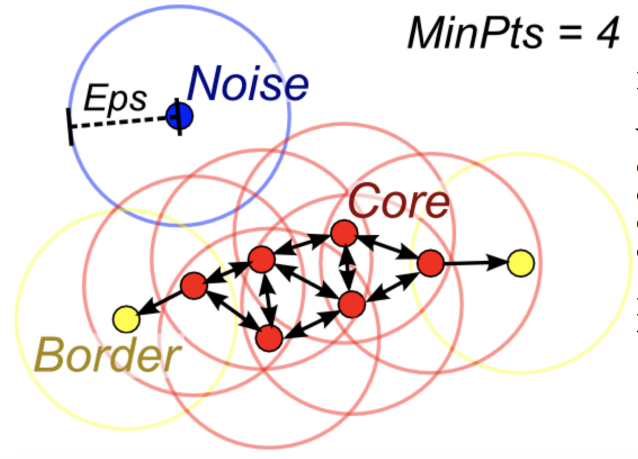</center>

* **核心点（core point）**：该点以为圆心半径$eps$内至少包含$MinPts$个点;
* **边界点（edge point）**： 该点不是核心点，但在其$eps$半径范围内存在核心点
* **噪音点（noise point）**：既不是核心点，也不是边界点的任何点;


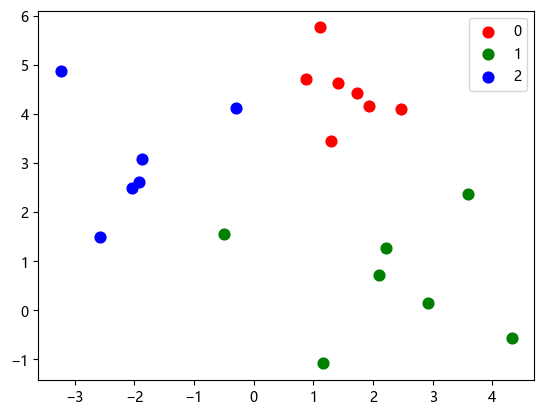

Original labels
[0 2 0 1 1 2 2 1 0 0 1 0 1 1 0 2 2 2 1 0]


In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=0, n_samples=20)

colors = ["red",  "green", "blue"]

for label in range(3):
    plt.scatter(X[y==label, 0], X[y==label, 1], c=colors[label], s=60, label=f"{label}")
plt.legend()
plt.show()

print("Original labels")
print(y)

新建`DBSCAN`对象有两个关键参数，`min_samples`和`eps`，
即作为核心点，在其半径`eps`范围内至少要有`min_samples`样本点，描述核心的‘密度’。

In [3]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=2, eps=1)
clusters = dbscan.fit_predict(X)

print("\nCluster memberships:")
print(clusters)


Cluster memberships:
[-1  0  1  2 -1 -1 -1 -1  1  1 -1  1 -1  2  1  0 -1  0  2  1]


min_samples: 2 eps: 1.000 cluster: [-1  0  1  2 -1 -1 -1 -1  1  1 -1  1 -1  2  1  0 -1  0  2  1]
min_samples: 2 eps: 1.500 cluster: [ 0  1  0  2 -1  1 -1 -1  0  0 -1  0 -1  2  0  1  0  1  2  0]
min_samples: 2 eps: 2.000 cluster: [ 0  0  0  1  1  0 -1 -1  0  0  1  0  0  1  0  0  0  0  1  0]
min_samples: 2 eps: 3.000 cluster: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000 cluster: [-1  0  1  2 -1 -1 -1 -1  1  1 -1  1 -1  2  1  0 -1  0  2  1]
min_samples: 3 eps: 1.500 cluster: [ 0  1  0  2 -1  1 -1 -1  0  0 -1  0 -1  2  0  1  0  1  2  0]
min_samples: 3 eps: 2.000 cluster: [ 0  0  0  1  1  0 -1 -1  0  0  1  0  0  1  0  0  0  0  1  0]
min_samples: 3 eps: 3.000 cluster: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000 cluster: [-1 -1  0 -1 -1 -1 -1 -1  0  0 -1  0 -1 -1  0 -1 -1 -1 -1  0]
min_samples: 5 eps: 1.500 cluster: [ 0 -1  0 -1 -1 -1 -1 -1  0  0 -1  0 -1 -1  0 -1  0 -1 -1  0]
min_samples: 5 eps: 2.000 cluster: [ 0  0  0 -1 -1  0 -1 -1  0  0 -1  

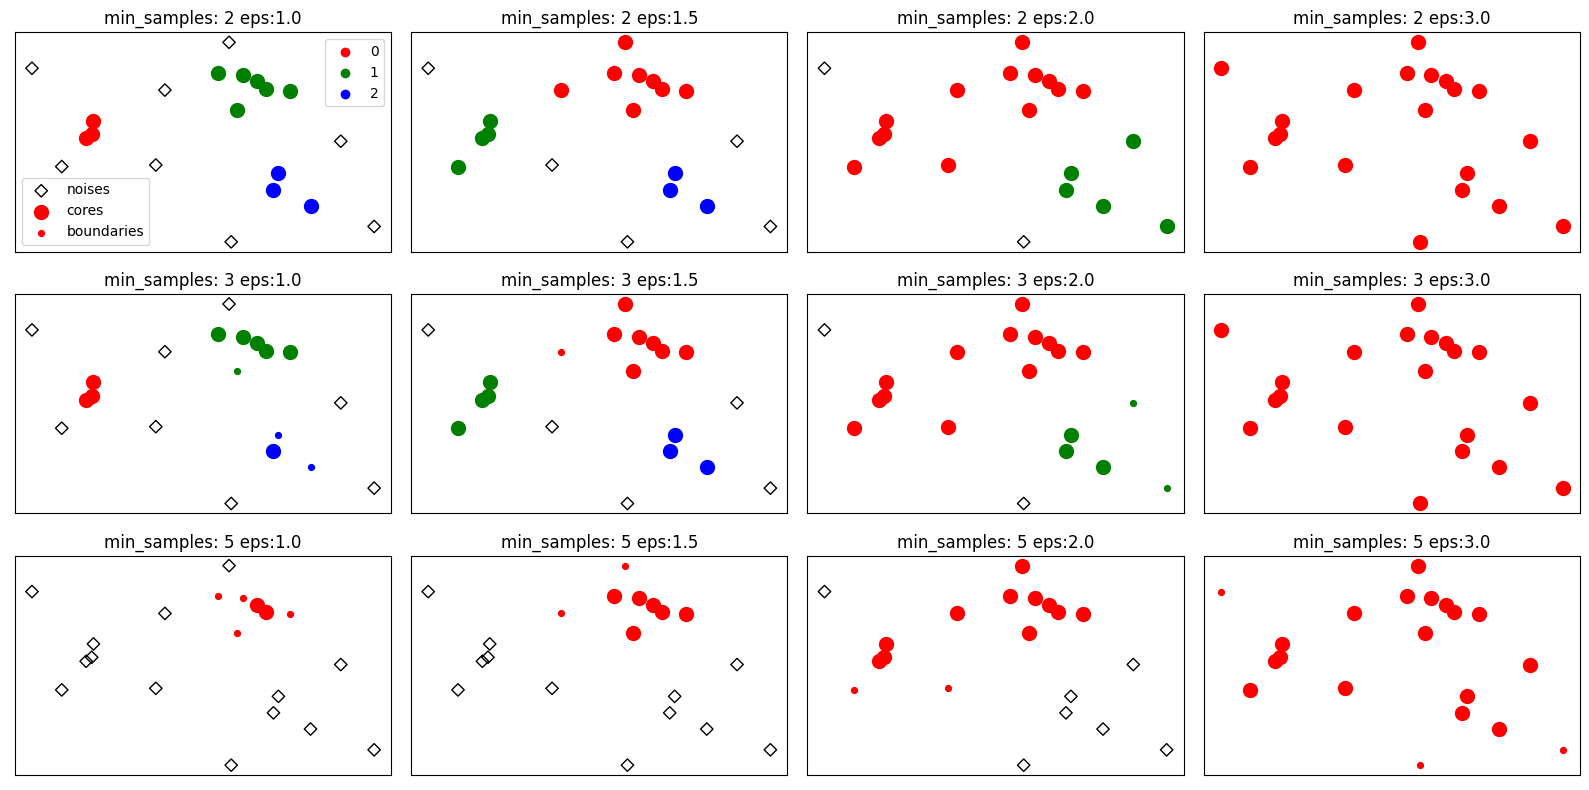

In [29]:
def plot_dbscan():
    X, y = make_blobs(random_state=0, n_samples=20)

    dbscan = DBSCAN()
    clusters = dbscan.fit_predict(X)
    clusters

    fig, axes = plt.subplots(3, 4, figsize=(16, 8), dpi=100,
                             subplot_kw={'xticks': (), 'yticks': ()})
    colors = ["red",  "green", "blue"]

    for i, min_samples in enumerate([2, 3, 5]):
        for j, eps in enumerate([1, 1.5, 2, 3]):
            dbscan = DBSCAN(min_samples=min_samples, eps=eps)
            clusters = dbscan.fit_predict(X)
            print(f"min_samples: {min_samples} eps: {eps:0.3f} cluster: {clusters}")
            
            
            cores = np.empty(X.shape[0], dtype=bool)
            cores[dbscan.core_sample_indices_] = True
            
            ax = axes[i,j]
            for label in np.unique(clusters[clusters >=0]):
                color = np.array([plt.cm.tab10(label)])
                members = X[(clusters==label) & (cores),:]
                ax.scatter(members[:,0], members[:, 1], marker="o", c=colors[label], s=100)
                members = X[(clusters==label) & (cores != True),:]
                ax.scatter(members[:,0], members[:, 1], marker=".", c=colors[label], s=70, label="boundaries")
                
            noises = X[clusters==-1,:]
            ax.scatter(noises[:,0], noises[:, 1], marker="D", ec="k", c="none", s=40)
            
            ax.set_title(f"min_samples: {min_samples} eps:{eps :0.1f}")
    
    ax = axes[0, 0]
    handles = [
        ax.scatter([],[], marker="D", ec="k", c="none", s=40, label="noises"),
        ax.scatter([],[], marker="o", c="red", s=100, label="cores"),
        ax.scatter([],[], marker=".", c="red", s=70, label="boundaries"),
    ]
    legend1 = ax.legend(handles=handles, loc="lower left")
    ax.add_artist(legend1)
    handles = [ax.scatter([],[],c=c, label=f"{i}") for i, c in enumerate(colors)]
    ax.legend(handles=handles, loc="upper right")
    
    fig.tight_layout()
    
plot_dbscan()

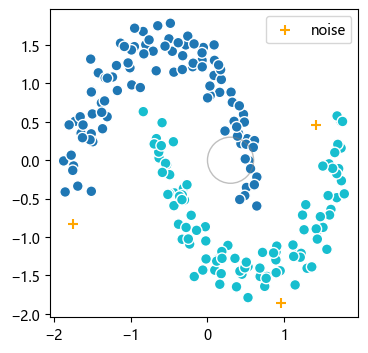

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=200, noise=0.09, random_state=0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

eps = 0.3

model = DBSCAN(eps=eps, min_samples=5)
clusters = model.fit_predict(X_scaled)

plt.figure(figsize=(5, 4))
ax = plt.gca()

ax.set_aspect(1)

xx, cc = X_scaled[clusters != -1], clusters[clusters != -1]
ax.scatter(xx[:, 0], xx[:, 1], c=cc, cmap=plt.cm.tab10, ec="w", s=60);

xx, cc = X_scaled[clusters == -1], clusters[clusters == -1]
ax.scatter(xx[:, 0], xx[:, 1], marker='+', c='orange', s=60, label="noise");

ax.add_artist( plt.Circle((eps, 0), eps, fill=False, color="grey", alpha=0.5) )

ax.legend();